# 🏠 House Price Prediction using Linear Regression
This notebook demonstrates how to predict house prices using square footage, number of bedrooms, and bathrooms using a Linear Regression model.


# Importing Libraries

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
import joblib
warnings.filterwarnings('ignore')

# Load the Dataset

In [5]:
df= pd.read_excel("kc_house_data.xlsx")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Selecting the Features

In [7]:
data = df[['sqft_living', 'bedrooms', 'bathrooms', 'price']]
data.describe()

,sqft_living,bedrooms,bathrooms,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2079.899736,3.370842,2.114757,5.400881e+05
std,918.440897,0.930062,0.770163,3.671272e+05
min,290.000000,0.000000,0.000000,7.500000e+04
25%,1427.000000,3.000000,1.750000,3.219500e+05
50%,1910.000000,3.000000,2.250000,4.500000e+05
75%,2550.000000,4.000000,2.500000,6.450000e+05
max,13540.000000,33.000000,8.000000,7.700000e+06


# Checking the missing values

In [9]:
data.isnull().sum()

sqft_living    0
bedrooms       0
bathrooms      0
price          0
dtype: int64

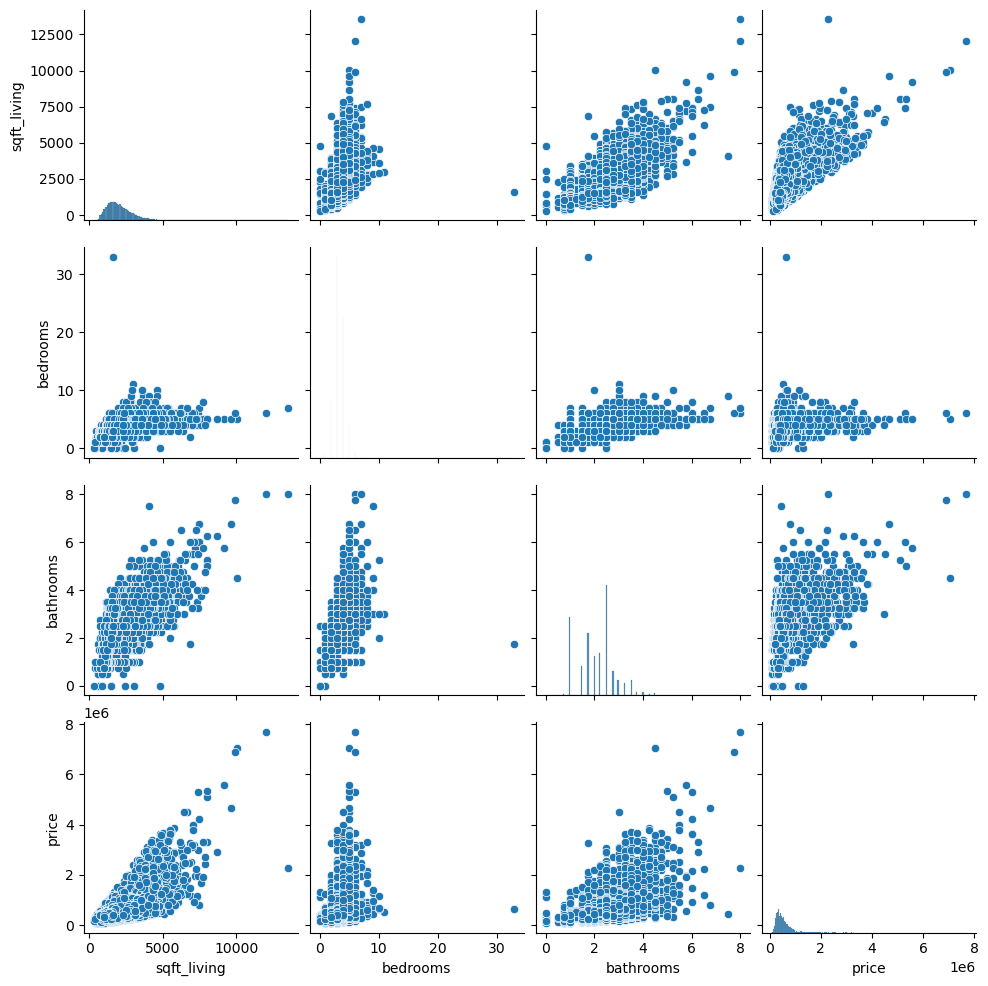

In [10]:
sns.pairplot(data)
plt.show()

# Selecting the input and output features

In [12]:
x=data[['sqft_living','bedrooms','bathrooms']]
y=data['price']

# Splitting the training and testing features

In [14]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=42)

# Training the model

In [16]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Model evaluation

In [18]:
y_pred= model.predict(x_test)

mse= mean_squared_error(y_pred, y_test)
rmse= np.sqrt(mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("RMSE:", rmse)
print("R² Score:", r2_score)

Coefficients: [   305.64613097 -56373.55481765  11296.92029198]
Intercept: 69884.29558379354
RMSE: 272465.84180991055
R² Score: <function r2_score at 0x00000269155EBC40>


# Visualization

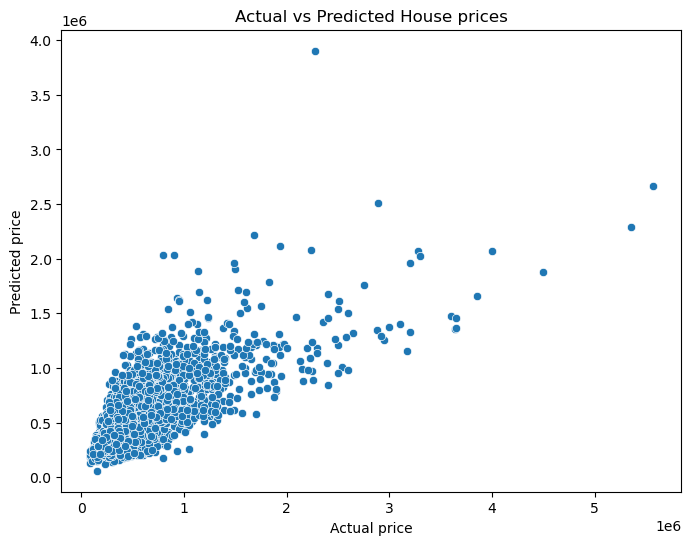

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Actual vs Predicted House prices')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

# Predicting New Input

In [43]:
input_data= pd.DataFrame([[2000,4,3]],columns=['sqft_living', 'bedrooms','bathrooms'])
prediction= model.predict(input_data)
print("Predicated Price:Rs", prediction[0])

Predicated Price:Rs 489573.0991367968


# Saving the model

In [46]:
joblib.dump(model, "house_price_model.pkl")

['house_price_model.pkl']

# Load the model

In [49]:
loaded_model=joblib.load('house_price_model.pkl')
loaded_prediction=loaded_model.predict(input_data)
print("Loaded model Prediction: ",loaded_prediction[0])

Loaded model Prediction:  489573.0991367968
